## DC Crime data analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

from shapely.geometry import box
from shapely.plotting import plot_polygon, plot_points
pd.set_option('display.max_columns', None)

In [2]:
#seting up palette 
palette = ["#FAC8BE", "#80E1C6", "#FFB3E1", "#6CC3FC", "#FFD168", "#C894E1"]
sns.set(rc={"axes.facecolor":"#e6e6e6","figure.facecolor":"#f5f5f5"})
cmap = colors.ListedColormap( ["#FAC8BE", "#80E1C6", "#FFB3E1", "#6CC3FC", "#FFD168", "#C894E1"])

In [6]:
# Load the dataset
df = pd.read_csv('./data/crime_dc.csv')
# Display the first 5 rows of the dataset
df.head()

,neighborhood_cluster,offense_group,census_tract,longitude,end_date,offense_text,shift,district,yblock,ward,year,offensekey,bid,sector,psa,ucr_rank,block_group,voting_precinct,xblock,block,start_date,ccn,offense,anc,report_date,method,location,latitude
0,cluster 38,violent,7404.0,-76.976591,NaN,HOMICIDE,midnight,7.0,131428.00,8.0,2023,violent|homicide,NaN,7D2,704.0,1,007404 1,precinct 117,402032.00,1800 - 1824 block of frederick douglass place se,2023-02-23 16:24:00,23029603,HOMICIDE,8C,2023-02-24 00:00:00,gun,"38.8506559459,-76.9765909045",38.850656
1,cluster 20,violent,9504.0,-76.993575,2023-06-16 18:53:00,ASSAULT W/DANGEROUS WEAPON,day,4.0,140787.56,5.0,2023,violent|assault w/dangerous weapon,NaN,4D2,405.0,3,009504 1,precinct 68,400557.06,900 - 998 block of michigan avenue ne,2023-06-16 18:29:00,23096959,ASSAULT W/DANGEROUS WEAPON,5B,2023-06-17 11:16:47,others,"38.934972488,-76.9935749549",38.934972
2,cluster 25,property,8410.0,-76.990893,2023-04-13 13:00:00,THEFT/OTHER,midnight,1.0,136927.00,6.0,2023,property|theft/other,NaN,1D2,104.0,6,008410 1,precinct 82,400790.00,1100 - 1199 block of h street ne,2023-04-12 19:30:00,23058339,THEFT/OTHER,6A,2023-04-15 03:15:41,others,"38.900195113,-76.9908927027",38.900195
3,cluster 1,property,3801.0,-77.040824,2023-08-20 22:02:00,THEFT/OTHER,evening,3.0,138822.23,1.0,2023,property|theft/other,adams morgan,3D3,303.0,6,003801 2,precinct 24,396459.65,1731 - 1785 block of florida avenue nw,2023-08-20 21:10:00,23137253,THEFT/OTHER,1C,2023-08-26 21:56:04,others,"38.9172612211,-77.0408237172",38.917261
4,cluster 6,property,10700.0,-77.040859,2023-05-20 15:54:00,THEFT/OTHER,evening,2.0,137483.00,2.0,2023,property|theft/other,golden triangle,2D3,207.0,6,010700 1,precinct 17,396456.00,1130 - 1199 block of connecticut avenue nw,2023-05-20 15:40:00,23079620,THEFT/OTHER,2C,2023-05-20 19:48:30,others,"38.9051969682,-77.0408588935",38.905197


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26091 entries, 0 to 26090
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   neighborhood_cluster  26091 non-null  object 
 1   offense_group         26091 non-null  object 
 2   census_tract          26080 non-null  float64
 3   longitude             26091 non-null  float64
 4   end_date              24003 non-null  object 
 5   offense_text          26091 non-null  object 
 6   shift                 26091 non-null  object 
 7   district              26091 non-null  float64
 8   yblock                26091 non-null  float64
 9   ward                  26089 non-null  float64
 10  year                  26091 non-null  int64  
 11  offensekey            26091 non-null  object 
 12  bid                   4668 non-null   object 
 13  sector                25946 non-null  object 
 14  psa                   25946 non-null  float64
 15  ucr_rank           

In [8]:
# Check for null values
df.isnull().sum()

neighborhood_cluster        0
offense_group               0
census_tract               11
longitude                   0
end_date                 2088
offense_text                0
shift                       0
district                    0
yblock                      0
ward                        2
year                        0
offensekey                  0
bid                     21423
sector                    145
psa                       145
ucr_rank                    0
block_group                11
voting_precinct             3
xblock                      0
block                       0
start_date                  2
ccn                         0
offense                     0
anc                         2
report_date                 0
method                      0
location                    0
latitude                    0
dtype: int64

In [10]:
df['neighborhood_cluster'].value_counts().sort_index()

neighborhood_cluster
Unknown          2
cluster 1      673
cluster 10     228
cluster 11     286
cluster 12     215
cluster 13     164
cluster 14     252
cluster 15     443
cluster 16     101
cluster 17     729
cluster 18    1141
cluster 19     453
cluster 2     1768
cluster 20     259
cluster 21    1241
cluster 22    1022
cluster 23    1248
cluster 24     410
cluster 25    1879
cluster 26     854
cluster 27     552
cluster 28     230
cluster 29      45
cluster 3     1579
cluster 30     389
cluster 31     605
cluster 32     621
cluster 33     661
cluster 34     771
cluster 35     357
cluster 36     239
cluster 37     323
cluster 38     389
cluster 39    1059
cluster 4      423
cluster 40      17
cluster 41       2
cluster 43      53
cluster 44      25
cluster 45      39
cluster 46       9
cluster 5      312
cluster 6     1080
cluster 7      892
cluster 8     1563
cluster 9      488
Name: count, dtype: int64

In [11]:
df['offense_group'].value_counts().sort_index()

offense_group
property    21976
violent      4115
Name: count, dtype: int64

In [13]:
df['shift'].value_counts().sort_index()

shift
day          9838
evening     10088
midnight     6165
Name: count, dtype: int64

In [14]:
df['district'].value_counts().sort_index()

district
1.0    3480
2.0    4086
3.0    5152
4.0    3214
5.0    4423
6.0    3425
7.0    2311
Name: count, dtype: int64

In [16]:
df['sector'].value_counts().sort_index()

sector
1D1    1012
1D2    1415
1D3    1052
2D1     982
2D2    1024
2D3    2080
3D1    1228
3D2    2087
3D3    1694
4D1    1080
4D2    1090
4D3    1042
5D1    1650
5D2    1531
5D3    1243
6D1    1116
6D2    1208
6D3    1101
7D1     849
7D2     752
7D3     710
Name: count, dtype: int64

In [17]:
df['psa'].value_counts().sort_index()

psa
101.0     487
102.0     233
103.0     292
104.0     592
105.0     202
106.0     850
107.0     477
108.0     346
201.0     173
202.0     285
203.0     524
204.0     415
205.0     188
206.0     421
207.0     706
208.0     805
209.0     569
301.0     425
302.0     799
303.0     631
304.0     429
305.0    1205
306.0     366
307.0     638
308.0     516
401.0     428
402.0     326
403.0     326
404.0     525
405.0     368
406.0     411
407.0     311
408.0     238
409.0     279
501.0     956
502.0     694
503.0     622
504.0     344
505.0     565
506.0     555
507.0     688
601.0     194
602.0     576
603.0     627
604.0     474
605.0     403
606.0     355
607.0     450
608.0     346
701.0     246
702.0     250
703.0     353
704.0     314
705.0     209
706.0     297
707.0     229
708.0     413
Name: count, dtype: int64

In [18]:
df['block'].value_counts().sort_index()

block
0 - 0 block of francis scott key bridge nw    1
0 - 61 block of observatory circle nw         1
1  - 199 block of tuckerman street nw         2
1  - 199 block of webster street nw           2
1  - 30 block of underwood place ne           1
                                             ..
westminster street nw and 10th street nw      1
westminster street nw and 9th street nw       1
wheeler road se and alabama avenue se         1
wheeler road se and mississippi avenue se     1
wheeler road se and southern avenue se        1
Name: count, Length: 7334, dtype: int64

In [19]:
df['offense'].value_counts().sort_index()

offense
ARSON                            9
ASSAULT W/DANGEROUS WEAPON    1110
BURGLARY                       821
HOMICIDE                       214
MOTOR VEHICLE THEFT           5429
ROBBERY                       2668
SEX ABUSE                      123
THEFT F/AUTO                  5880
THEFT/OTHER                   9837
Name: count, dtype: int64

In [20]:
df['method'].value_counts().sort_index()

method
gun        2671
knife       352
others    23068
Name: count, dtype: int64

In [21]:
df['offense_text'].value_counts().sort_index()

offense_text
ARSON                            9
ASSAULT W/DANGEROUS WEAPON    1110
BURGLARY                       821
HOMICIDE                       214
MOTOR VEHICLE THEFT           5429
ROBBERY                       2668
SEX ABUSE                      123
THEFT F/AUTO                  5880
THEFT/OTHER                   9837
Name: count, dtype: int64

In [24]:
## for property type
df[df['offense_group']=='property']['method'].value_counts().sort_index()

method
gun          34
knife        27
others    21915
Name: count, dtype: int64

In [25]:
df[df['offense_group']=='violent']['method'].value_counts().sort_index()

method
gun       2637
knife      325
others    1153
Name: count, dtype: int64

In [27]:
df[df['offense_group']=='property']['offense'].value_counts().sort_index()

offense
ARSON                     9
BURGLARY                821
MOTOR VEHICLE THEFT    5429
THEFT F/AUTO           5880
THEFT/OTHER            9837
Name: count, dtype: int64

In [28]:
df[df['offense_group']=='violent']['offense'].value_counts().sort_index()

offense
ASSAULT W/DANGEROUS WEAPON    1110
HOMICIDE                       214
ROBBERY                       2668
SEX ABUSE                      123
Name: count, dtype: int64

/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


<Figure size 2000x2000 with 0 Axes>

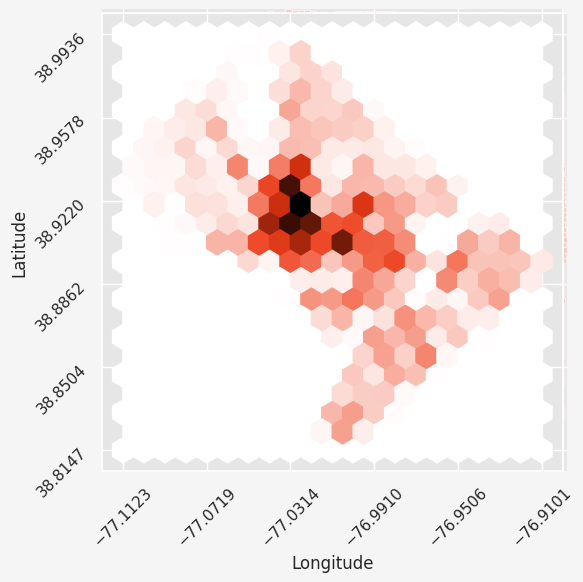

In [6]:
# Crimes based on Latitude and Longitude

plt.figure(figsize=(20, 20))
ax = sns.jointplot(x=df['longitude'], y=df['latitude'], kind='hex', gridsize=20, 
                   color=palette[0],marginal_ticks=False,ratio=100
                  )
ax.ax_marg_y.set_yticks(np.linspace(min(df['latitude']), max(df['latitude']), 6))  
ax.ax_marg_x.set_xticks(np.linspace(min(df['longitude']), max(df['longitude']), 6))  
# plt.tight_layout()
# plt.title("Crimes based on Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.yticks(rotation=45)
plt.xticks(rotation=45)
ax.savefig('./dc_crime_overview.png',dpi=150)

/tmp/ipykernel_3237579/2712791808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='method', palette = palette)
/tmp/ipykernel_3237579/2712791808.py:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(data=df, x='method', palette = palette)


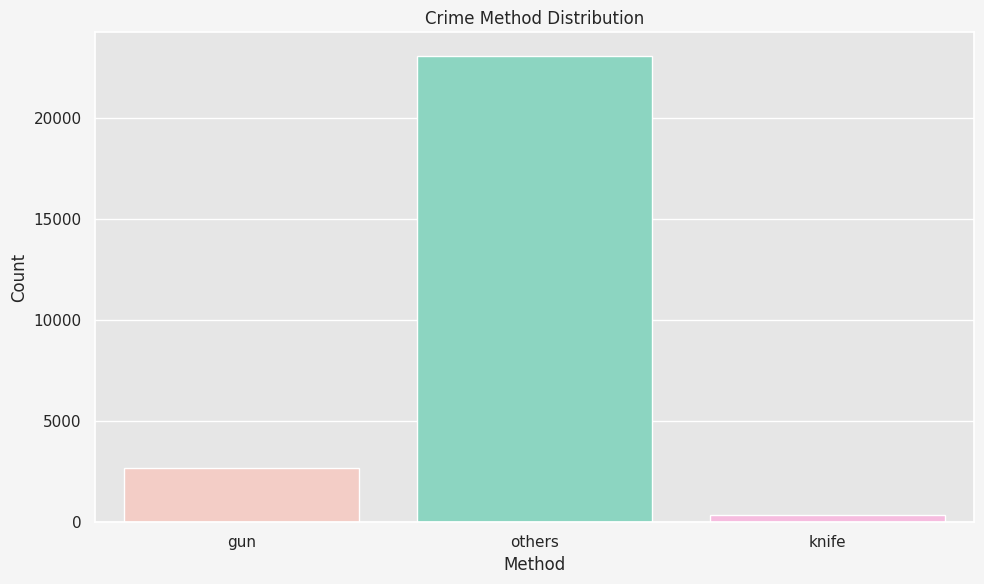

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='method', palette = palette)
plt.title('Crime Method Distribution')
plt.xlabel('Method')
plt.ylabel('Count')
plt.tight_layout()

In [11]:
df['offense'].value_counts().index

Index(['THEFT/OTHER', 'THEFT F/AUTO', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'ASSAULT W/WEAPON', 'BURGLARY', 'HOMICIDE', 'SEX ABUSE', 'ARSON'],
      dtype='object', name='offense')

In [9]:
df.loc[df['offense']=='ASSAULT W/DANGEROUS WEAPON','offense']='ASSAULT W/WEAPON'
# df.loc[df['offense']=='ASSAULT W/DANGEROUS WEAPON','offense']='ASSAULT W/WEAPON'

/tmp/ipykernel_3237579/3498302133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='offense',palette=palette, order=df['offense'].value_counts().index)
/tmp/ipykernel_3237579/3498302133.py:2: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='offense',palette=palette, order=df['offense'].value_counts().index)


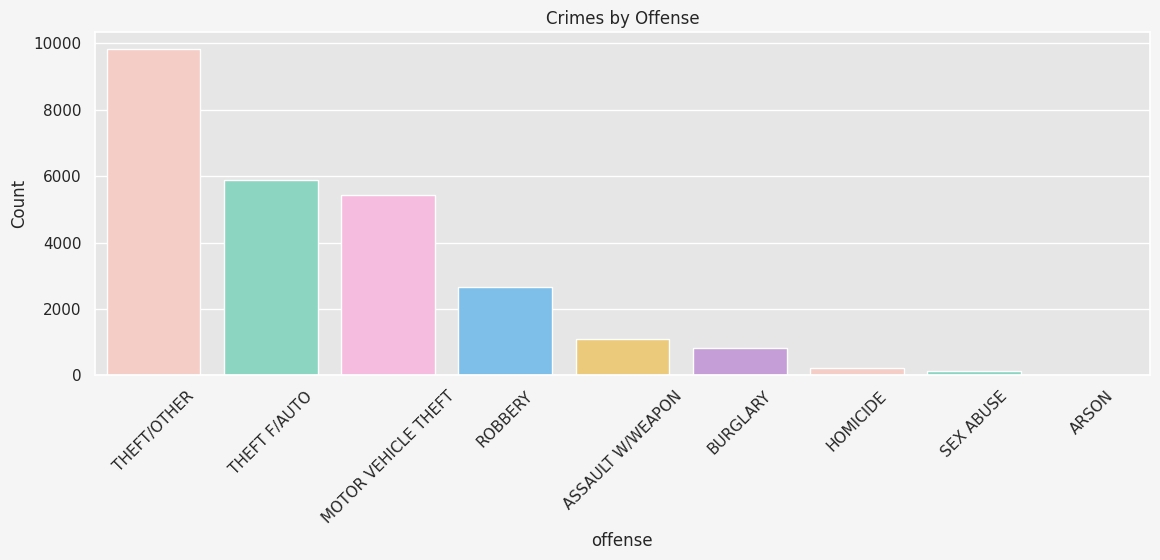

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='offense',palette=palette, order=df['offense'].value_counts().index)
plt.title('Crimes by Offense')
# plt.xlabel('Offense')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.savefig('crime_by_offense_type.png',dpi=150)

In [11]:
df['offense'].value_counts()

offense
THEFT/OTHER            9837
THEFT F/AUTO           5880
MOTOR VEHICLE THEFT    5429
ROBBERY                2668
ASSAULT W/WEAPON       1110
BURGLARY                821
HOMICIDE                214
SEX ABUSE               123
ARSON                     9
Name: count, dtype: int64

/tmp/ipykernel_3237579/4112301069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='district',palette=palette)
/tmp/ipykernel_3237579/4112301069.py:3: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='district',palette=palette)


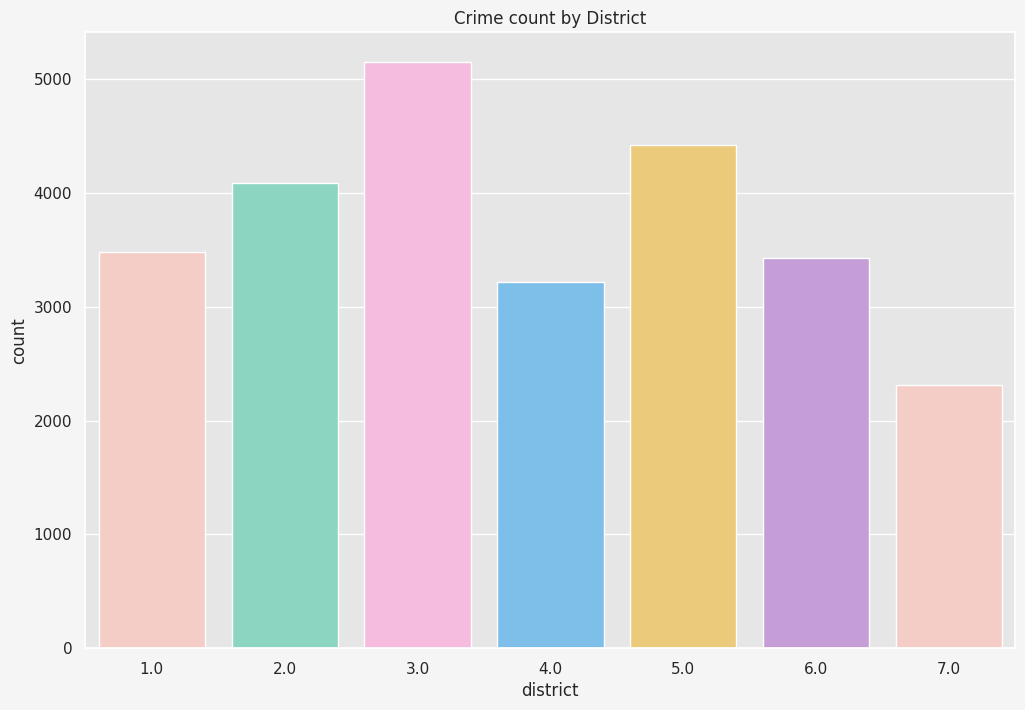

In [12]:
# Exploring crime count by district
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='district',palette=palette)
plt.title("Crime count by District")
plt.show()

/tmp/ipykernel_3237579/1085233934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ward',palette=palette)
/tmp/ipykernel_3237579/1085233934.py:3: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='ward',palette=palette)


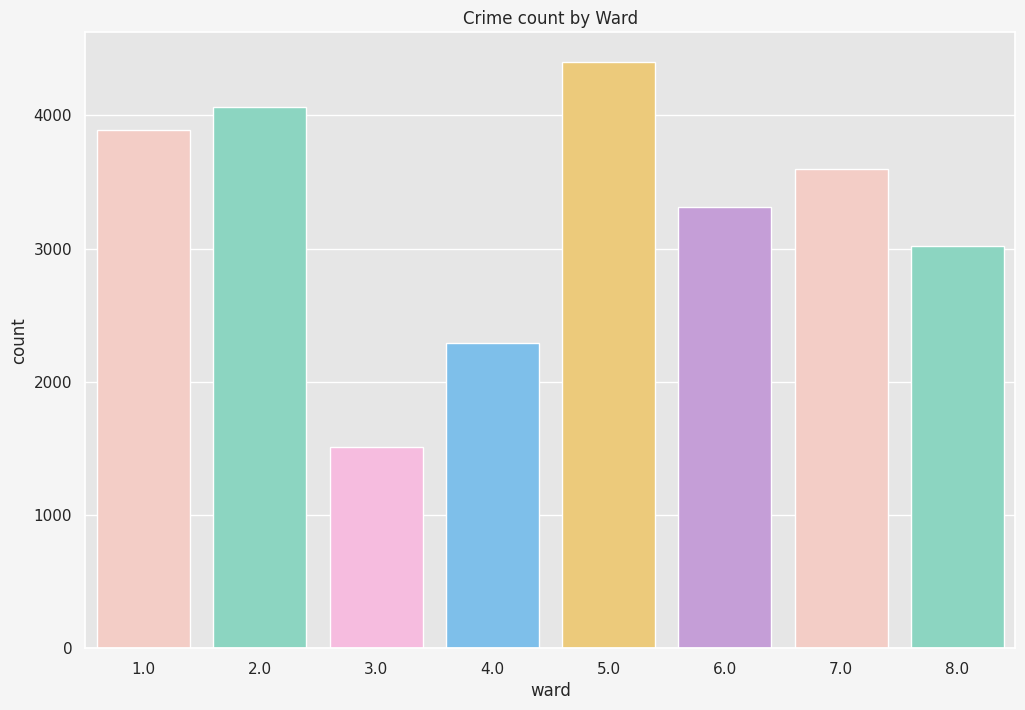

In [13]:
# Exploring crime count by district
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='ward',palette=palette)
plt.title("Crime count by Ward")
plt.show()

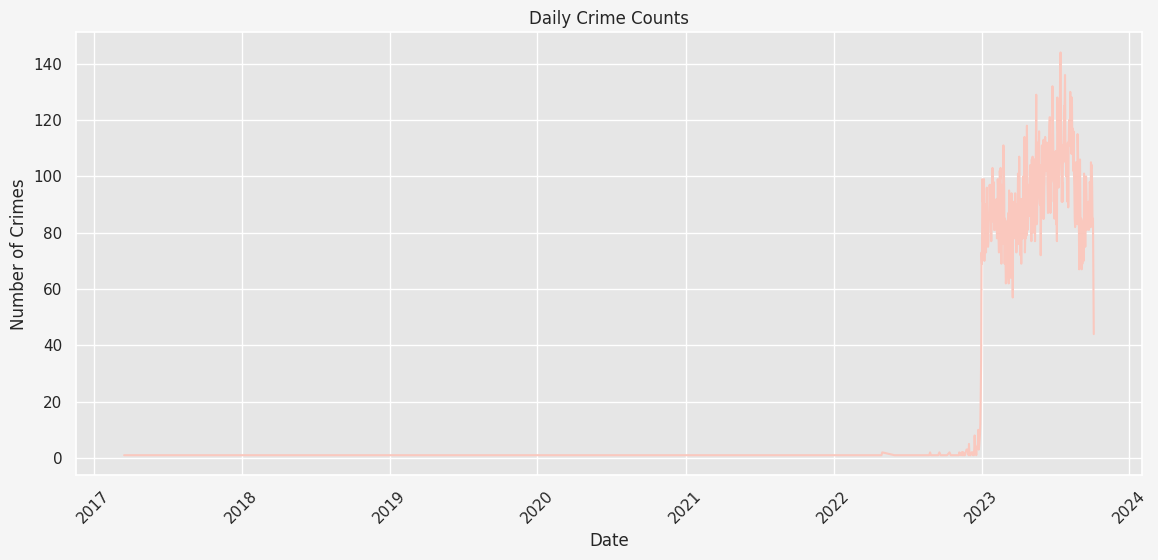

In [14]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

daily_counts = df['start_date'].dt.date.value_counts().sort_index()
weekly_counts = df['start_date'].dt.to_period('W').value_counts().sort_index()
monthly_counts = df['start_date'].dt.to_period('M').value_counts().sort_index()

# Daily
plt.figure(figsize=(12,6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, color = palette[0])
plt.title('Daily Crime Counts')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

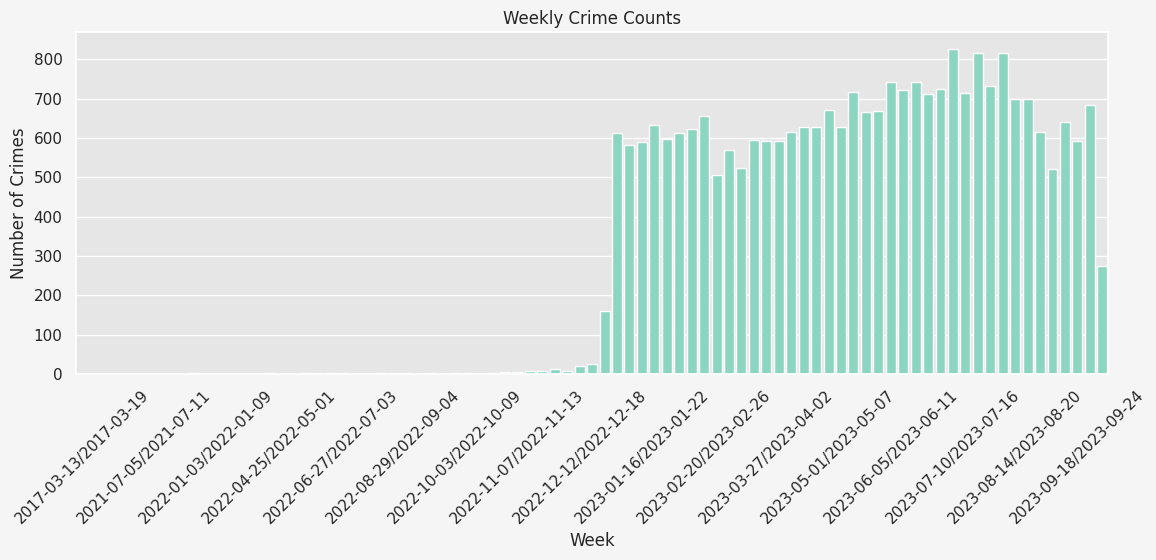

In [15]:
# Weekly
plt.figure(figsize=(12,6))
sns.barplot(x=weekly_counts.index.astype(str), y=weekly_counts.values, color=palette[1])
locs, labels = plt.xticks()
plt.xticks(locs[::5], weekly_counts.index.astype(str)[::5], rotation=45)

plt.title('Weekly Crime Counts')
plt.xlabel('Week')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

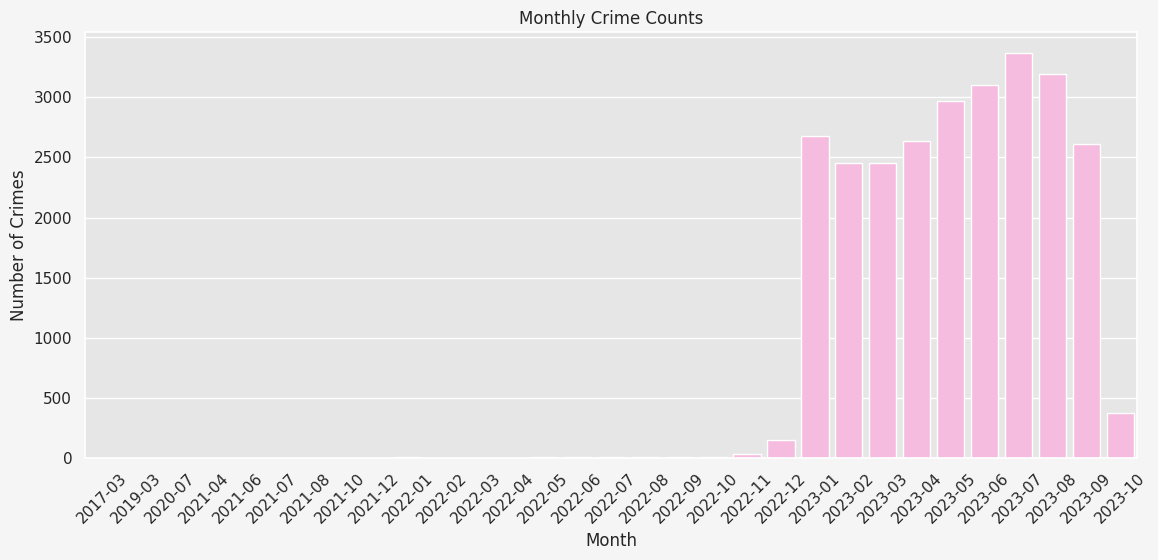

In [16]:
# Monthly
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_counts.index.astype(str), y=monthly_counts.values,color=palette[2])
plt.title('Monthly Crime Counts')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_3237579/423166062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=days, y=weekday_counts, palette=palette)
/tmp/ipykernel_3237579/423166062.py:6: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=days, y=weekday_counts, palette=palette)


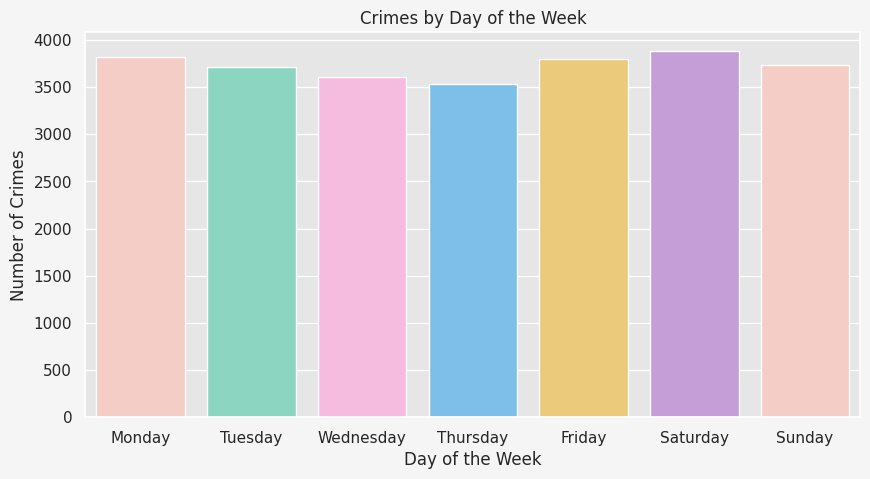

In [15]:
df['day_of_week'] = df['start_date'].dt.dayofweek
weekday_counts = df['day_of_week'].value_counts().sort_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,5))
sns.barplot(x=days, y=weekday_counts, palette=palette)
plt.title('Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

/tmp/ipykernel_3237579/3295946534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts, palette=palette)
/tmp/ipykernel_3237579/3295946534.py:5: UserWarning: 
The palette list has fewer values (6) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=hourly_counts.index, y=hourly_counts, palette=palette)


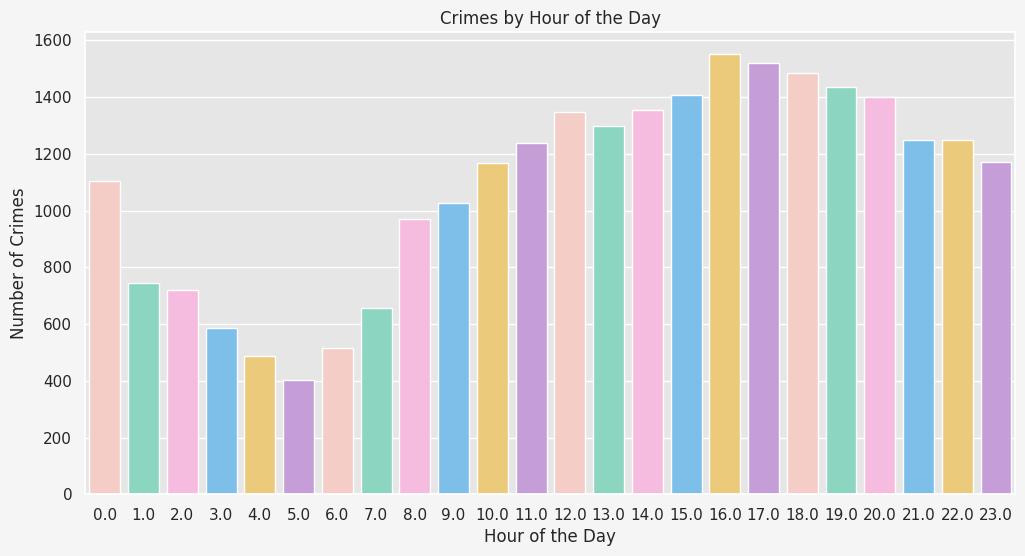

In [16]:
df['hour'] = df['start_date'].dt.hour
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=hourly_counts.index, y=hourly_counts, palette=palette)
plt.title('Crimes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(24), rotation=0)
plt.show()

# other DC data

In [22]:
import geopandas as gpd

metro_lines = gpd.read_file('./data/dc-maps/maps/metro-lines.geojson')
atm = gpd.read_file('./data/dc-maps/maps/atm-banking.geojson')
banks = gpd.read_file('./data/dc-maps/maps/bank-locations.geojson')
gas = gpd.read_file('./data/dc-maps/maps/gas-stations.geojson')
hospitals = gpd.read_file('./data/dc-maps/maps/hospitals.geojson')
# benches = gpd.read_file('./data/dc-maps/maps/benches.geojson') # toomany
dc_boundary = gpd.read_file('./data/dc-maps/maps/dc-boundary.geojson')
district = gpd.read_file('./data/dc-maps/maps/district-mask.geojson')
libraries = gpd.read_file('./data/dc-maps/maps/libraries.geojson')
metro_stations=gpd.read_file('./data/dc-maps/maps/metro-station-entrances-district.geojson')
parks = gpd.read_file('./data/dc-maps/maps/national-parks.geojson')
museums = gpd.read_file('./data/dc-maps/maps/museums-in-dc.geojson')
police_stations = gpd.read_file('./data/dc-maps/maps/police-stations.geojson')
shuttle_bus = gpd.read_file('./data/dc-maps/maps/shuttle-bus-stops.geojson')
shopping_centers = gpd.read_file('./data/dc-maps/maps/shopping-centers.geojson')
camera = gpd.read_file('./data/dc-maps/maps/camera-enforcement-locations.geojson')
grocery=gpd.read_file('./data/dc-maps/maps/grocery-store-locations.geojson')
metro_bus = gpd.read_file('./data/dc-maps/maps/metro-bus-stops.geojson')
post_office = gpd.read_file('./data/dc-maps/maps/post-offices.geojson')
schools = gpd.read_file('./data/dc-maps/maps/public-schools.geojson')

# metro_bus = gpd.read_file('./data/dc-maps/maps/metro-bus-stops.geojson')
# metro_bus = gpd.read_file('./data/dc-maps/maps/metro-bus-stops.geojson')
# metro_bus = gpd.read_file('./data/dc-maps/maps/metro-bus-stops.geojson')

<Axes: >

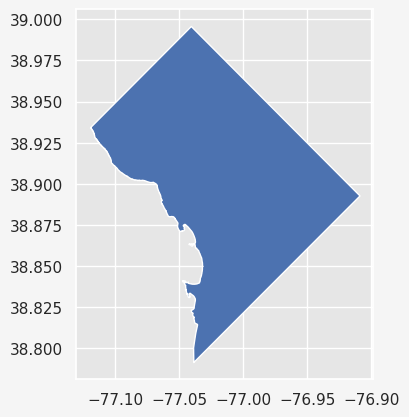

In [23]:
dc_boundary.plot()

In [24]:
# make crime_data a geopanda frame
df['geometry'] = gpd.points_from_xy(df['longitude'], df['latitude'])
crime_data = gpd.GeoDataFrame(df, crs="EPSG:4326")


In [25]:
def fishnet(geometry, step=0.01):
    bounds = geometry.bounds
    xmin,ymin,xmax,ymax=bounds
    result = []
    for i in np.arange(xmin, xmax, step):
        for j in np.arange(ymin, ymax, step):
            b = box(i, j, i+step, j+step)
            g = geometry.intersection(b)
            if g.is_empty:
                continue
            result.append(g)
    return result

In [26]:
polygon=dc_boundary['geometry'][0]
res=fishnet(polygon, 0.005)
nets=gpd.GeoDataFrame(geometry=res)
nets['index']=range(len(nets))

In [27]:
len(res)

823

In [28]:
def merge_into_nets(nets,geo_data, count_name='counts'):
    # find the net for each incident
    geo_data = gpd.sjoin(geo_data,nets, how='left', op='within')
    # group by the net
    counts=geo_data.groupby('index_right').size().rename(count_name)
    # merge the group count back to nets
    geo_data=nets.merge(counts, left_on='index', right_on='index_right', how='left')
    
    geo_data=geo_data.fillna(0)
    return geo_data

In [29]:
crime_data.columns

Index(['neighborhood_cluster', 'offense_group', 'census_tract', 'longitude',
       'end_date', 'offense_text', 'shift', 'district', 'yblock', 'ward',
       'year', 'offensekey', 'bid', 'sector', 'psa', 'ucr_rank', 'block_group',
       'voting_precinct', 'xblock', 'block', 'start_date', 'ccn', 'offense',
       'anc', 'report_date', 'method', 'location', 'latitude', 'day_of_week',
       'hour', 'geometry'],
      dtype='object')

In [31]:
# filter by the offense type
theft_other=crime_data[crime_data['offense']=='THEFT/OTHER']
theft_auto=crime_data[crime_data['offense']=='THEFT F/AUTO']
theft_v=crime_data[crime_data['offense']=='MOTOR VEHICLE THEFT']
robbery=crime_data[crime_data['offense']=='ROBBERY']
assault=crime_data[crime_data['offense']=='ASSAULT W/WEAPON']
burglary=crime_data[crime_data['offense']=='BURGLARY']
homicide=crime_data[crime_data['offense']=='HOMICIDE']
sexabuse=crime_data[crime_data['offense']=='SEX ABUSE']
arson=crime_data[crime_data['offense']=='ARSON']

In [32]:
# filter by methods: gun, knife, others
gun=crime_data[crime_data['method']=='gun']
knife=crime_data[crime_data['method']=='knife']
methods_others=crime_data[crime_data['method']=='others']

In [33]:
crime_net_agg=merge_into_nets(nets,crime_data,count_name='all_crime_counts')
crime_net_agg=merge_into_nets(crime_net_agg,libraries,count_name='libraries')
crime_net_agg=merge_into_nets(crime_net_agg,atm,count_name='atm')
crime_net_agg=merge_into_nets(crime_net_agg,banks,count_name='banks')
crime_net_agg=merge_into_nets(crime_net_agg,gas,count_name='gas')
crime_net_agg=merge_into_nets(crime_net_agg,metro_stations,count_name='metro_stations')

crime_net_agg=merge_into_nets(crime_net_agg,parks,count_name='parks')
crime_net_agg=merge_into_nets(crime_net_agg,museums,count_name='museums')
crime_net_agg=merge_into_nets(crime_net_agg,police_stations,count_name='police_stations')
crime_net_agg=merge_into_nets(crime_net_agg,shopping_centers,count_name='shopping_centers')

crime_net_agg=merge_into_nets(crime_net_agg,theft_other,count_name='theft_o')
crime_net_agg=merge_into_nets(crime_net_agg,theft_auto,count_name='theft_auto')
crime_net_agg=merge_into_nets(crime_net_agg,theft_v,count_name='theft_v')

crime_net_agg=merge_into_nets(crime_net_agg,robbery,count_name='robbery')
crime_net_agg=merge_into_nets(crime_net_agg,assault,count_name='assault')
crime_net_agg=merge_into_nets(crime_net_agg,burglary,count_name='burglary')

crime_net_agg=merge_into_nets(crime_net_agg,homicide,count_name='homicide')
crime_net_agg=merge_into_nets(crime_net_agg,sexabuse,count_name='sexabuse')
crime_net_agg=merge_into_nets(crime_net_agg,arson,count_name='arson')

crime_net_agg=merge_into_nets(crime_net_agg,gun,count_name='gun')
crime_net_agg=merge_into_nets(crime_net_agg,knife,count_name='knife')
crime_net_agg=merge_into_nets(crime_net_agg,methods_others,count_name='methods_others')

crime_net_agg=merge_into_nets(crime_net_agg,camera,count_name='camera')
crime_net_agg=merge_into_nets(crime_net_agg,grocery,count_name='grocery')
crime_net_agg=merge_into_nets(crime_net_agg,metro_bus,count_name='metro_bus')
crime_net_agg=merge_into_nets(crime_net_agg,post_office,count_name='post_office')
crime_net_agg=merge_into_nets(crime_net_agg,schools,count_name='schools')
crime_net_agg=merge_into_nets(crime_net_agg,shuttle_bus,count_name='shuttle_bus')

crime_net_agg=merge_into_nets(crime_net_agg,crime_data,count_name='day_of_week')
crime_net_agg=merge_into_nets(crime_net_agg,crime_data,count_name='hour')

# camera = gpd.read_file('./data/dc-maps/maps/camera-enforcement-locations.geojson')
# grocery=gpd.read_file('./data/dc-maps/maps/grocery-store-locations.geojson')
# metro_bus = gpd.read_file('./data/dc-maps/maps/metro-bus-stops.geojson')
# post_office = gpd.read_file('./data/dc-maps/maps/post-offices.geojson')
# schools = gpd.read_file('./data/dc-maps/maps/public-schools.geojson')

/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_3237579/2695261207.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  geo_data = gpd.sjoin(geo_data,nets, how='left', op='within')
/tmp/ipykernel_3237579/2695261207.py:9: DeprecationWarning: ExtensionArray.fillna added a 'copy' keyword in pandas 2.1.0. In a future version, ExtensionArray subclasses will need to implement this keyword or an exception will be raised. In the interim, the keyword is ignored by GeometryArray.
  geo_data=geo_data.fillna(0)
/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/IPython/core

/tmp/ipykernel_3237579/2695261207.py:9: DeprecationWarning: ExtensionArray.fillna added a 'copy' keyword in pandas 2.1.0. In a future version, ExtensionArray subclasses will need to implement this keyword or an exception will be raised. In the interim, the keyword is ignored by GeometryArray.
  geo_data=geo_data.fillna(0)
/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_3237579/2695261207.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  geo_data = gpd.sjoin(geo_data,nets, how='left', op='within')
/tmp/ipykernel_3237579/2695261207.py:9: DeprecationWarning: ExtensionA

/tmp/ipykernel_3237579/2695261207.py:9: DeprecationWarning: ExtensionArray.fillna added a 'copy' keyword in pandas 2.1.0. In a future version, ExtensionArray subclasses will need to implement this keyword or an exception will be raised. In the interim, the keyword is ignored by GeometryArray.
  geo_data=geo_data.fillna(0)
/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_3237579/2695261207.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  geo_data = gpd.sjoin(geo_data,nets, how='left', op='within')
/tmp/ipykernel_3237579/2695261207.py:9: DeprecationWarning: ExtensionA

/tmp/ipykernel_3237579/976544847.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=days, y=weekday_counts, palette=palette)
/tmp/ipykernel_3237579/976544847.py:5: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=days, y=weekday_counts, palette=palette)


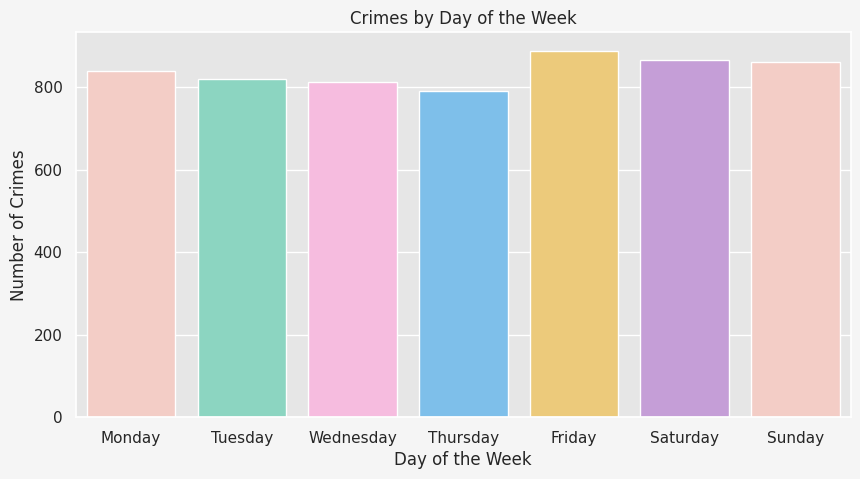

In [36]:


weekday_counts = theft_auto['day_of_week'].value_counts().sort_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,5))
sns.barplot(x=days, y=weekday_counts, palette=palette)
plt.title('Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


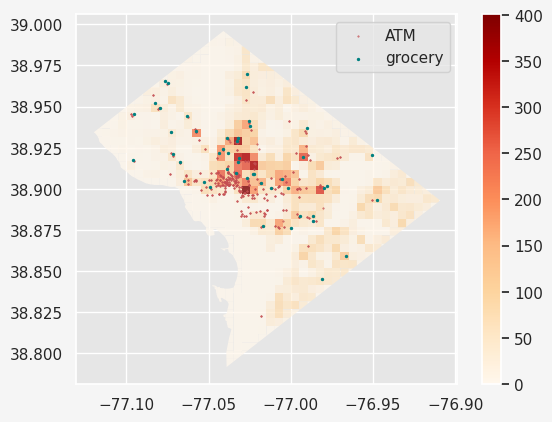

In [29]:
# plot other things
ax=atm.plot(color='r',markersize=0.2,zorder=2,label='ATM')
# ax=metro_stations.plot(ax=ax, color='g',zorder=4, markersize=2, label='metro stations')
# ax=gas.plot(color='b',markersize=1, ax=ax,zorder=3,label='gas stations')


ax=grocery.plot(ax=ax,color='teal',markersize=2,zorder=3, label='grocery')



crime_net_agg.plot(column='all_crime_counts', edgecolor="none",  ax=ax,legend=True,cmap='OrRd',alpha=0.8,zorder=1)
plt.legend()

/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future

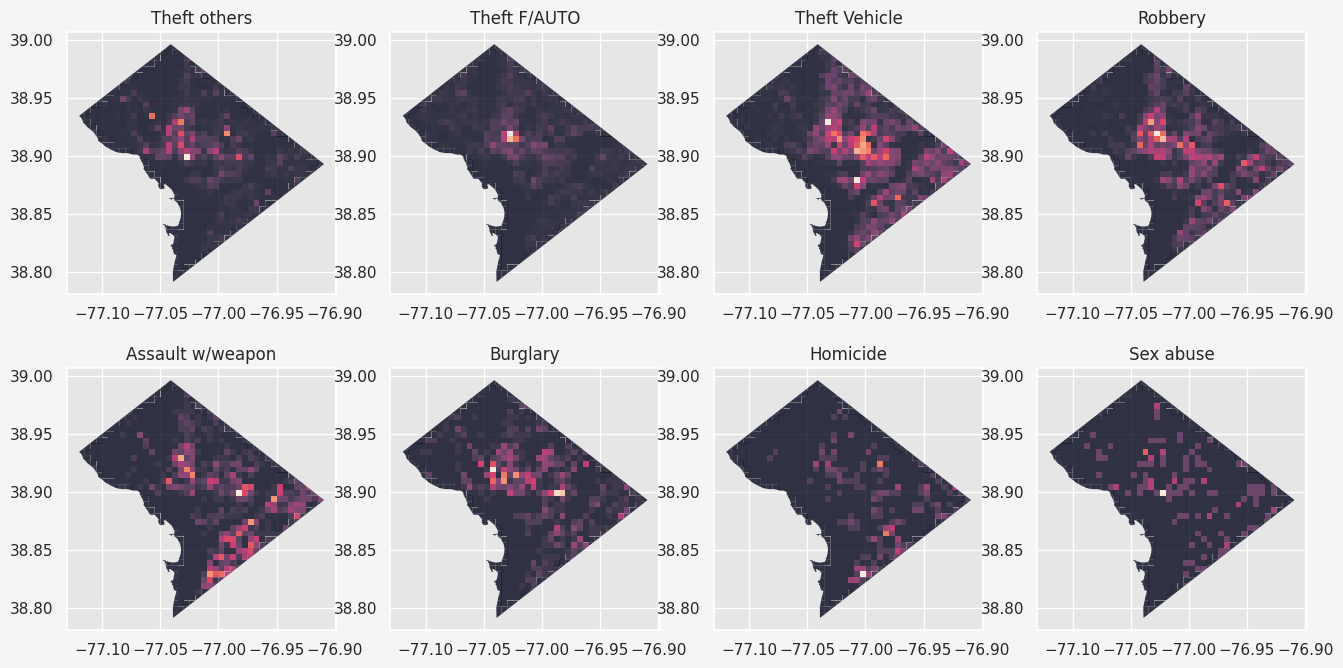

In [30]:
fig, axs = plt.subplots(2, 4, figsize=(16,8))
axs = np.ravel(axs)
crime_net_agg.plot(column='theft_o',ax=axs[0], edgecolor="none",  legend=False,alpha=0.8,zorder=1)
axs[0].set_title('Theft others')

crime_net_agg.plot(column='theft_auto',ax=axs[1], edgecolor="none",  legend=False,alpha=0.8,zorder=1)
axs[1].set_title('Theft F/AUTO')

crime_net_agg.plot(column='theft_v',ax=axs[2], edgecolor="none",  legend=False,alpha=0.8,zorder=1)
axs[2].set_title('Theft Vehicle')

crime_net_agg.plot(column='robbery',ax=axs[3], edgecolor="none",  legend=False,alpha=0.8,zorder=1)
axs[3].set_title('Robbery')

crime_net_agg.plot(column='assault',ax=axs[4], edgecolor="none",  legend=False,alpha=0.8,zorder=1)
axs[4].set_title('Assault w/weapon')

crime_net_agg.plot(column='burglary',ax=axs[5], edgecolor="none",  legend=False,alpha=0.8,zorder=1)
axs[5].set_title('Burglary')

crime_net_agg.plot(column='homicide',ax=axs[6], edgecolor="none",  legend=False,alpha=0.8,zorder=1)
axs[6].set_title('Homicide')

crime_net_agg.plot(column='sexabuse',ax=axs[7], edgecolor="none",  legend=False,alpha=0.8,zorder=1)
axs[7].set_title('Sex abuse')

plt.savefig('./crime_by_offense.png',dpi=150,bbox_inches='tight')

In [43]:
crime_net_agg.columns

Index(['geometry', 'index', 'all_crime_counts', 'libraries', 'atm', 'banks',
       'gas', 'metro_stations', 'parks', 'museums', 'police_stations',
       'shopping_centers', 'theft_o', 'theft_auto', 'theft_v', 'robbery',
       'assault', 'burglary', 'homicide', 'sexabuse', 'arson', 'gun', 'knife',
       'methods_others', 'camera', 'grocery', 'metro_bus', 'post_office',
       'schools', 'shuttle_bus', 'day_of_week', 'hour'],
      dtype='object')

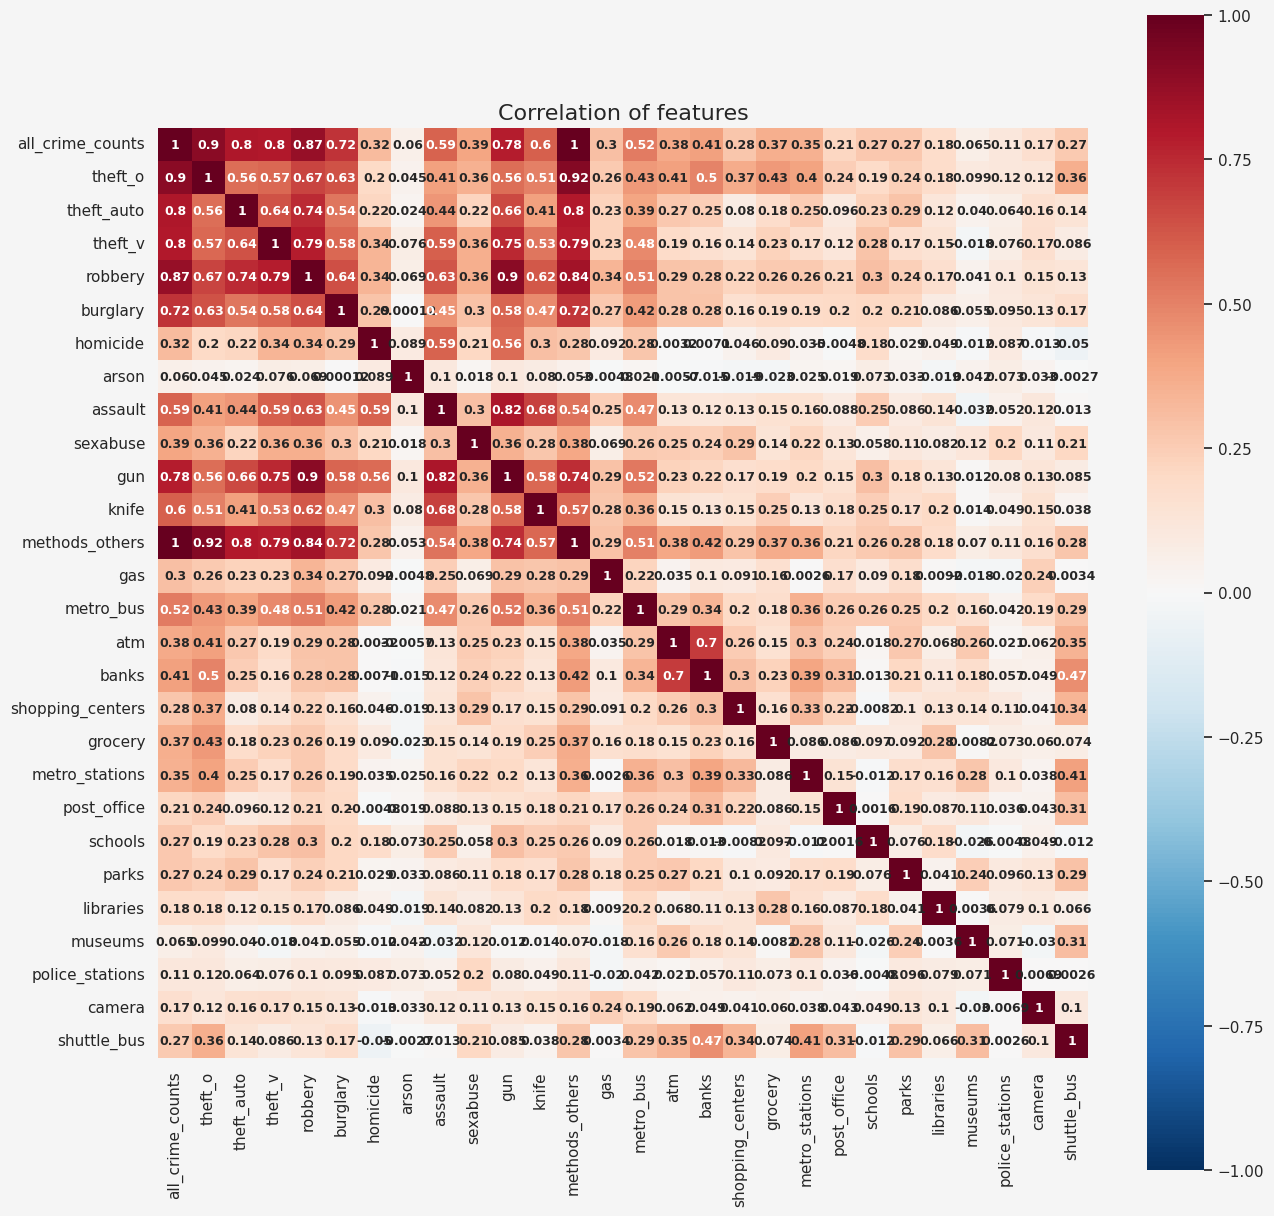

In [46]:
# corrlations

columns=['all_crime_counts',
         'theft_o', 'theft_auto', 'theft_v', 'robbery',
        'burglary', 'homicide', 'arson',
         'assault','sexabuse', 
    'gun', 'knife',   'methods_others',
    'gas','metro_bus','atm', 'banks','shopping_centers','grocery','metro_stations','post_office','schools','parks',
    'libraries', 'museums', 'police_stations','camera',   'shuttle_bus',
#          'day_of_week','hour'
       ]
plt.figure(figsize=(15, 15))
plt.title('Correlation of features', size=16)
sns.heatmap(
    crime_net_agg[columns].corr(), vmax=1.0, vmin=-1.0, square=True, cmap='RdBu_r', linecolor='white',
    annot=True, annot_kws={'size': 9, 'weight': 'bold'}, 
)

plt.savefig('./correlation.png',dpi=150,bbox_inches='tight')

In [45]:
crime_net_agg[columns]

,all_crime_counts,theft_o,theft_auto,theft_v,robbery,burglary,homicide,arson,assault,sexabuse,...,post_office,schools,parks,libraries,museums,police_stations,camera,shuttle_bus,day_of_week,hour
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,25.0,8.0,1.0,8.0,3.0,0.0,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,25.0
819,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0
820,45.0,11.0,9.0,12.0,7.0,0.0,1.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,45.0
821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
knife['offense'].value_counts(normalize=True)

offense
ASSAULT W/WEAPON    0.605114
ROBBERY             0.275568
THEFT/OTHER         0.073864
HOMICIDE            0.031250
SEX ABUSE           0.011364
BURGLARY            0.002841
Name: proportion, dtype: float64

In [150]:
theft_v['method'].value_counts(normalize=True)

method
others    0.999263
gun       0.000737
Name: proportion, dtype: float64

In [145]:
gun['offense'].value_counts(normalize=True)

offense
ROBBERY                0.645077
ASSAULT W/WEAPON       0.271434
HOMICIDE               0.067765
THEFT/OTHER            0.007862
SEX ABUSE              0.002995
BURGLARY               0.001872
MOTOR VEHICLE THEFT    0.001498
THEFT F/AUTO           0.001498
Name: proportion, dtype: float64

## Model

In [38]:
# given the date of the week and hour of the day, predict the crime rate and crime type over DC area

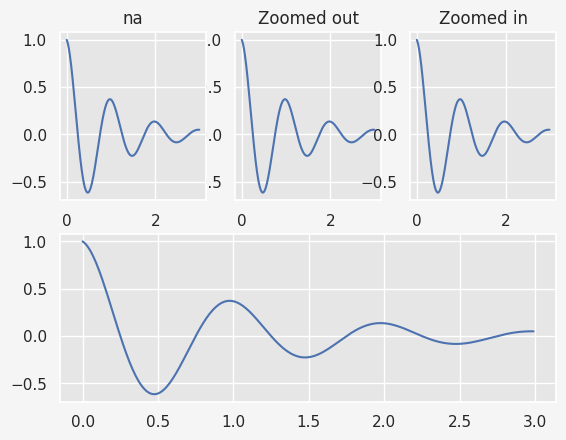

In [196]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
t1 = np.arange(0.0, 3.0, 0.01)

plt.subplot(2,1,2)
          # Default margin is 0.05, value 0 means fit
plt.plot(t1, f(t1))

plt.subplot(2,3,2)
plt.plot(t1, f(t1))
plt.title('Zoomed out')

plt.subplot(2,3, 3)
plt.plot(t1, f(t1))
plt.title('Zoomed in')

plt.subplot(2,3, 1)
plt.plot(t1, f(t1))
plt.title('na')

plt.show() 
